In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [14]:
all_res = glob("out/**/*.pkl")

In [15]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [16]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [17]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,100,0.173650,0.654809,0.049751
1,200,0.150851,0.477499,0.035805
2,20,0.230985,0.545169,0.075770
3,20,0.216443,0.485820,0.058782
4,10,0.226739,0.537969,0.073297
...,...,...,...,...
131,20,0.232214,0.556955,0.070979
132,100,0.166583,0.501608,0.041478
133,20,0.222090,0.611481,0.070250
134,50,0.182502,0.569832,0.049196


In [18]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std"]
)

In [19]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

In [20]:
compiled_grouped_res

mae           max_error            mse  \
                                     mean       std      mean  std      mean   
representation num_train_points                                                
DreherDoyle    10                     NaN       NaN       NaN  NaN       NaN   
               200               0.288333  0.028577       1.0  0.0  0.288333   
SuzukiMiyaura  10                0.385385  0.046753       1.0  0.0  0.385385   
               20                0.393846  0.065488       1.0  0.0  0.393846   
               50                0.323462  0.056635       1.0  0.0  0.323462   
               100               0.285600  0.070361       1.0  0.0  0.285600   
               200               0.243600  0.052590       1.0  0.0  0.243600   

                                           
                                      std  
representation num_train_points            
DreherDoyle    10                     NaN  
               200               0.028577  
SuzukiMiyaura  10                0.046753  
               20                0.065488  
               50                0.056635  
               100               0.070361  
               200               0.052590

In [21]:
compiled_rxnfp_linear_grouped

mae           max_error                 mse          
                      mean       std      mean       std      mean       std
num_train_points                                                            
10                0.235404  0.025746  0.607139  0.096808  0.079174  0.016175
20                0.231545  0.024463  0.551946  0.047918  0.074043  0.013173
50                0.205306  0.012966  0.564200  0.041564  0.061733  0.006574
100               0.187819  0.016037  0.572066  0.057058  0.053404  0.006893
200               0.183088  0.009992  0.567386  0.060069  0.051291  0.005394

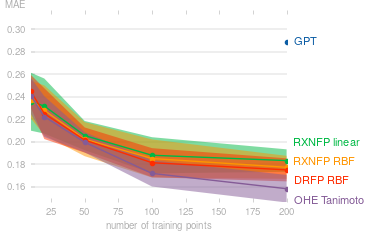

In [22]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    ax.plot(
        compiled_grouped_res.loc["DreherDoyle", :].index,
        compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
        label="GPT",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["DreherDoyle", :].index,
        compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
        - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
        compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
        + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_rxnfp_linear_grouped.index,
        compiled_rxnfp_linear_grouped["mae"]["mean"],
        label="RXNFP linear",
        marker="o",
    )

    ax.fill_between(
        compiled_rxnfp_linear_grouped.index,
        compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["std"],
        compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_rxnfp_rbf_grouped.index,
        compiled_rxnfp_rbf_grouped["mae"]["mean"],
        label="RXNFP RBF",
        marker="o",
    )

    ax.fill_between(
        compiled_rxnfp_rbf_grouped.index,
        compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["std"],
        compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_drfp_linear_grouped.index,
        compiled_drfp_linear_grouped["mae"]["mean"],
        label="DRFP RBF",
        marker="o",
    )

    ax.fill_between(
        compiled_drfp_linear_grouped.index,
        compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["std"],
        compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_ohe_tanimoto_grouped.index,
        compiled_ohe_tanimoto_grouped["mae"]["mean"],
        label="OHE Tanimoto",
        marker="o",
    )

    ax.fill_between(
        compiled_ohe_tanimoto_grouped.index,
        compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["std"],
        compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE")
    # ax.set_xscale('log')

fig.savefig("suzuki_regression_res.pdf", bbox_inches="tight")